In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('ratings_small.csv').drop(['timestamp'],axis=1)
movie_titles = pd.read_csv('movies_metadata.csv', usecols=['id', 'title'])
movie_titles = movie_titles.rename(columns={'id': 'movieId'})
movie_titles['movieId'] = pd.to_numeric(movie_titles['movieId'], errors='coerce')
df = pd.merge(df,movie_titles,on='movieId')
df.head()

,userId,movieId,rating,title
0,1,1371,2.5,Rocky III
1,4,1371,4.0,Rocky III
2,7,1371,3.0,Rocky III
3,19,1371,4.0,Rocky III
4,21,1371,3.0,Rocky III


In [4]:
df.describe()

,userId,movieId,rating
count,44994.000000,44994.000000,44994.000000
mean,345.963395,6010.754901,3.560986
std,194.871031,15918.243916,1.053169
min,1.000000,2.000000,0.500000
25%,177.000000,500.000000,3.000000
50%,359.000000,1394.000000,4.000000
75%,518.000000,2805.000000,4.000000
max,671.000000,160718.000000,5.000000


In [5]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
!Women Art Revolution,3.25
'Gator Bait,0.50
'Twas the Night Before Christmas,4.00
...And God Created Woman,4.00
00 Schneider - Jagd auf Nihil Baxter,4.00


In [8]:
ratings['number_of_ratings'] = df.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
!Women Art Revolution,3.25,2
'Gator Bait,0.50,1
'Twas the Night Before Christmas,4.00,2
...And God Created Woman,4.00,1
00 Schneider - Jagd auf Nihil Baxter,4.00,2


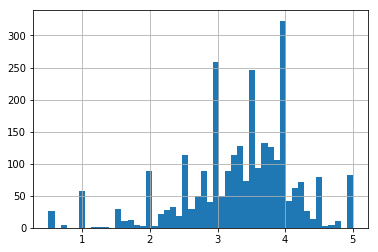

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)

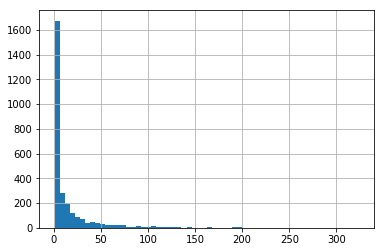

In [9]:
ratings['number_of_ratings'].hist(bins=60)

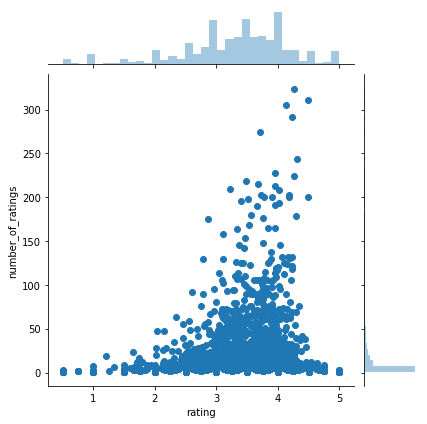

In [10]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

In [12]:
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...And God Created Woman,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 Angry Men,...,Zodiac,Zombie Flesh Eaters,Zombie Holocaust,Zozo,eXistenZ,xXx,¡Three Amigos!,À nos amours,Ödipussi,Şaban Oğlu Şaban
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Terminator 3: Rise of the Machines,4.256173,324
The Million Dollar Hotel,4.487138,311
Solaris,4.134426,305
The 39 Steps,4.221649,291
Monsoon Wedding,3.706204,274
Once Were Warriors,4.303279,244
Three Colors: Red,3.945175,228
Men in Black II,4.256696,224
The Passion of Joan of Arc,3.483945,218


In [17]:
Terminator_user_rating = movie_matrix['Terminator 3: Rise of the Machines']
Monsoon_user_rating = movie_matrix['Monsoon Wedding']

In [19]:
Terminator_user_rating.head()

userId
1    NaN
2    4.0
3    4.5
4    5.0
5    NaN
Name: Terminator 3: Rise of the Machines, dtype: float64

In [20]:
Monsoon_user_rating.head()

userId
1    NaN
2    4.0
3    NaN
4    5.0
5    NaN
Name: Monsoon Wedding, dtype: float64

In [21]:
similar_to_terminator=movie_matrix.corrwith(Terminator_user_rating)

/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [22]:
similar_to_terminator.head()

title
!Women Art Revolution                   NaN
'Gator Bait                             NaN
'Twas the Night Before Christmas        1.0
...And God Created Woman                NaN
00 Schneider - Jagd auf Nihil Baxter    1.0
dtype: float64

In [23]:
similar_to_monsoon=movie_matrix.corrwith(Monsoon_user_rating)

In [24]:
similar_to_monsoon.head()

title
!Women Art Revolution                   NaN
'Gator Bait                             NaN
'Twas the Night Before Christmas        1.0
...And God Created Woman                NaN
00 Schneider - Jagd auf Nihil Baxter    NaN
dtype: float64

In [25]:
corr_monsoon = pd.DataFrame(similar_to_monsoon, columns=['Correlation'])
corr_monsoon.dropna(inplace=True)
corr_monsoon.head()

,Correlation
title,
'Twas the Night Before Christmas,1.000000
10 Items or Less,-0.207570
10 Things I Hate About You,0.676161
1984,0.324443
2 Days in Paris,0.213201


In [26]:
corr_terminator = pd.DataFrame(similar_to_terminator, columns=['correlation'])
corr_terminator.dropna(inplace=True)
corr_terminator.head()

,correlation
title,
'Twas the Night Before Christmas,1.000000
00 Schneider - Jagd auf Nihil Baxter,1.000000
10 Items or Less,-0.361158
10 Things I Hate About You,0.487316
1984,0.914659


In [30]:
corr_terminator = corr_terminator.join(ratings['number_of_ratings'])
corr_monsoon = corr_monsoon.join(ratings['number_of_ratings'])
corr_terminator .head()


,Correlation,number_of_ratings
title,,
'Twas the Night Before Christmas,1.000000,2
10 Items or Less,-0.207570,11
10 Things I Hate About You,0.676161,7
1984,0.324443,8
2 Days in Paris,0.213201,12


In [31]:
corr_monsoon.head()

,Correlation,number_of_ratings
title,,
'Twas the Night Before Christmas,1.000000,2
10 Items or Less,-0.207570,11
10 Things I Hate About You,0.676161,7
1984,0.324443,8
2 Days in Paris,0.213201,12


In [32]:
corr_terminator[corr_terminator['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
title,,
Terminator 3: Rise of the Machines,1.000000,324
Men in Black II,0.472422,224
The Thomas Crown Affair,0.446644,179
Point Break,0.406478,132
The Man with the Golden Arm,0.356941,146
License to Wed,0.355508,202
The Talented Mr. Ripley,0.326833,131
Superstar: The Karen Carpenter Story,0.290548,108
The Prisoner of Zenda,0.282991,120


In [33]:
corr_monsoon[corr_monsoon['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Monsoon Wedding,1.000000,274
Ariel,0.563320,107
The Passion of Joan of Arc,0.496903,218
Rope,0.481058,190
Superstar: The Karen Carpenter Story,0.476380,108
Muxmäuschenstill,0.470062,105
A Nightmare on Elm Street,0.463808,180
Reign Over Me,0.446382,105
And Then There Were None,0.427330,130
